# Membandingkan Model Polynomial Regression  dan Regression Tree untuk Memprediksi Biaya Asuransi


UTS Pembelajaran Mesin dengan Python A (2023.01)

Anastasia Giovanka Matahelemual

6162001057

#### Pendahuluan

Industri asuransi menghadapi tantangan untuk mengadaptasi model prediktif yang lebih canggih untuk memperkirakan biaya asuransi dengan akurasi yang lebih tinggi. Dalam kajian prediktif biaya asuransi, penggunaan Model Polynomial Regression  dan Regression Tree telah mendapat perhatian khusus karena keunikan masing-masing dalam menangani kompleksitas data.

#### Tujuan

1. Membangun model Polynomial Regression dan Regression Tree untuk memprediksi biaya asuransi.
2. Membandingkan efektivitas Polynomial Regression dan Regression Tree dalam memprediksi biaya asuransi.

#### Dataset

Dataset yang akan digunakan dalam penelitian ini bersumber dari platform Kaggle. Dataset ini terdiri dari 1338 baris data yang terkait dengan individu yang diasuransikan, di mana biaya asuransi disajikan berdasarkan beberapa atribut dari individu tersebut. 

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Data Visualization

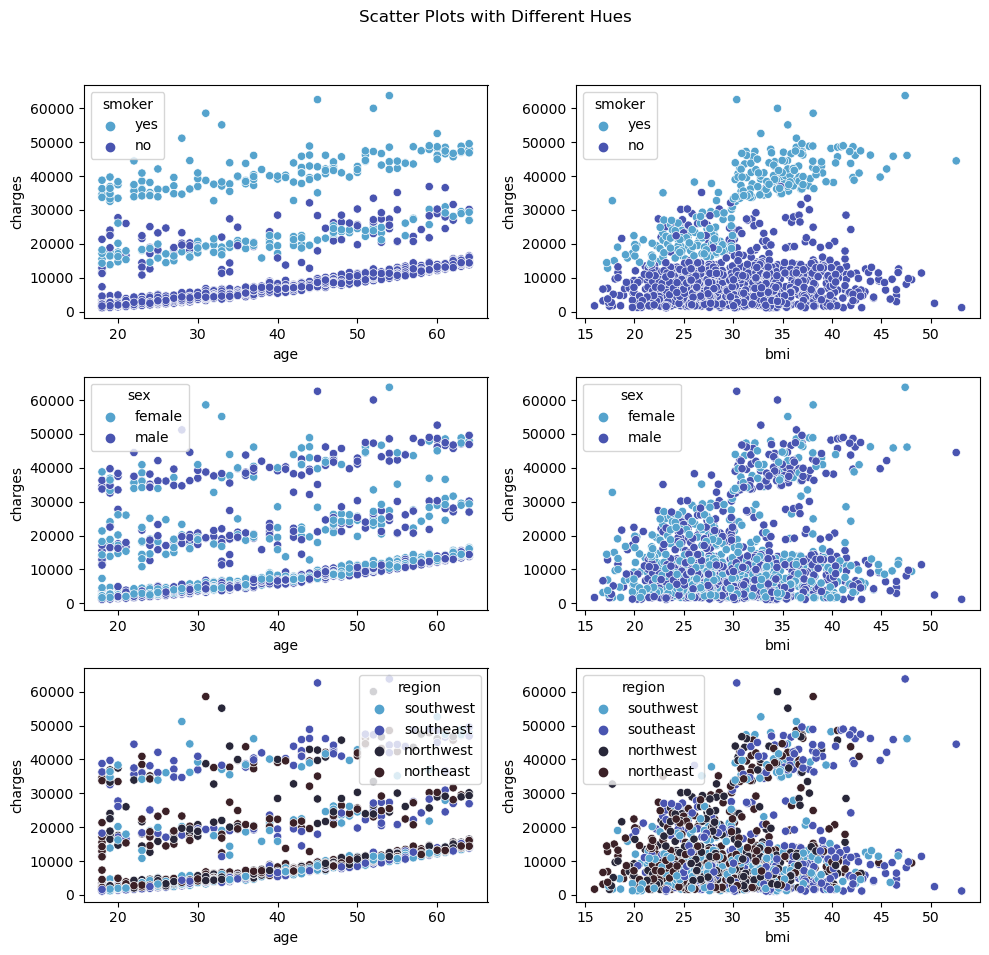

In [4]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10)) 
fig.suptitle('Scatter Plots with Different Hues')

palette='icefire'
sns.set_palette(palette) 

sns.scatterplot(x='age', y='charges', hue='smoker', data=df,  ax=axes[0, 0])
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df,  ax=axes[0, 1])

sns.scatterplot(x='age', y='charges', hue='sex', data=df,  ax=axes[1, 0])
sns.scatterplot(x='bmi', y='charges', hue='sex', data=df,  ax=axes[1, 1])

sns.scatterplot(x='age', y='charges', hue='region', data=df,  ax=axes[2, 0])
sns.scatterplot(x='bmi', y='charges', hue='region', data=df,  ax=axes[2, 1])

# Adjust layout for spacing
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()    

In [5]:
df = pd.get_dummies(data=df, columns=['smoker','sex'], drop_first=True)
df

,age,bmi,children,region,charges,smoker_yes,sex_male
0,19,27.900,0,southwest,16884.92400,1,0
1,18,33.770,1,southeast,1725.55230,0,1
2,28,33.000,3,southeast,4449.46200,0,1
3,33,22.705,0,northwest,21984.47061,0,1
4,32,28.880,0,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,0,1
1334,18,31.920,0,northeast,2205.98080,0,0
1335,18,36.850,0,southeast,1629.83350,0,0
1336,21,25.800,0,southwest,2007.94500,0,0


C:\Users\Anastasia Giovanka\AppData\Local\Temp\ipykernel_29468\1118322022.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


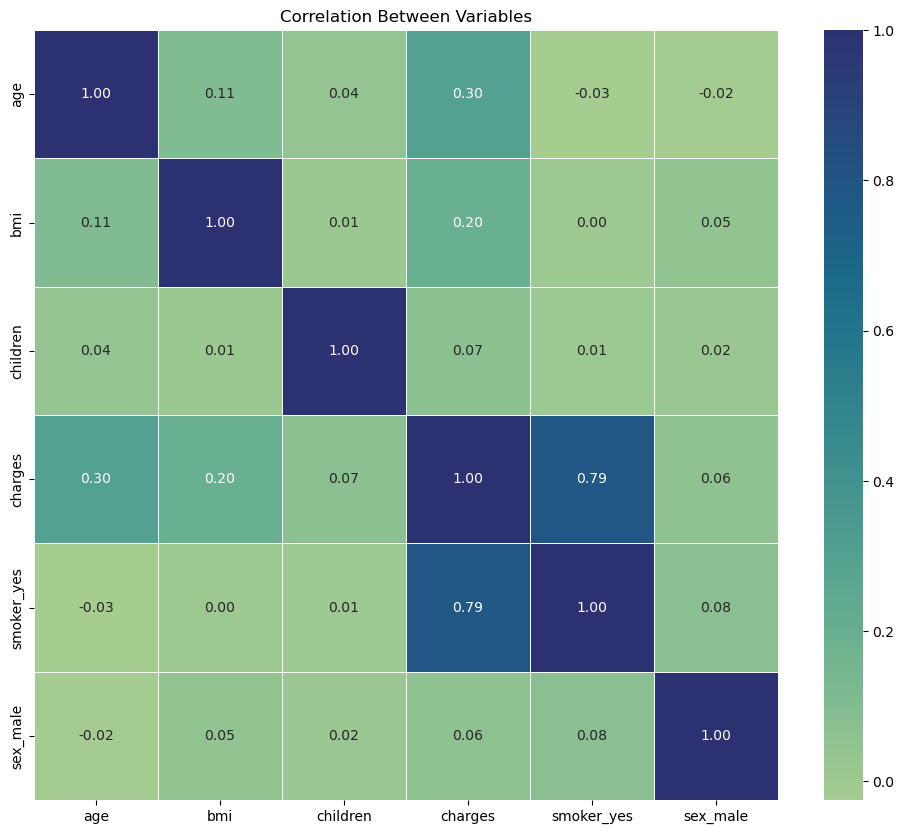

In [6]:
correlation_matrix = df.corr()

palette='crest'

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap=palette, linewidths=0.5, fmt=".2f")
plt.title('Correlation Between Variables')
plt.show()

Observasi:
- umur, bmi dan perokok ketiganya berkorelasi dengan variabel biaya.
- jenis kelamin dan wilayah tidak mempunyai pengaruh yang signifikan terhadap variabel biaya.

## Polynomial Regression

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df[['age', 'bmi', 'smoker_yes']]
y = df[['charges']]

# Split the data (training and testing sets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a Polynomial Features transformer
poly = PolynomialFeatures(degree=2)

# Transform the features into polynomial features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the polynomial features
model.fit(X_train_poly, y_train)

# Predict the charges
y_pred = model.predict(X_test_poly)

# Calculate MSE and R2 score
mse_poly = mean_squared_error(y_test, y_pred)
r2_poly = r2_score(y_test, y_pred)

print(f'MSE : {mse_poly}')
print(f'R² score : {r2_poly}')

MSE : 19520813.241241336
R² score : 0.8773278585856414


C:\Users\Anastasia Giovanka\AppData\Local\Temp\ipykernel_29468\4240444121.py:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, label="Actual Values")
C:\Users\Anastasia Giovanka\AppData\Local\Temp\ipykernel_29468\4240444121.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

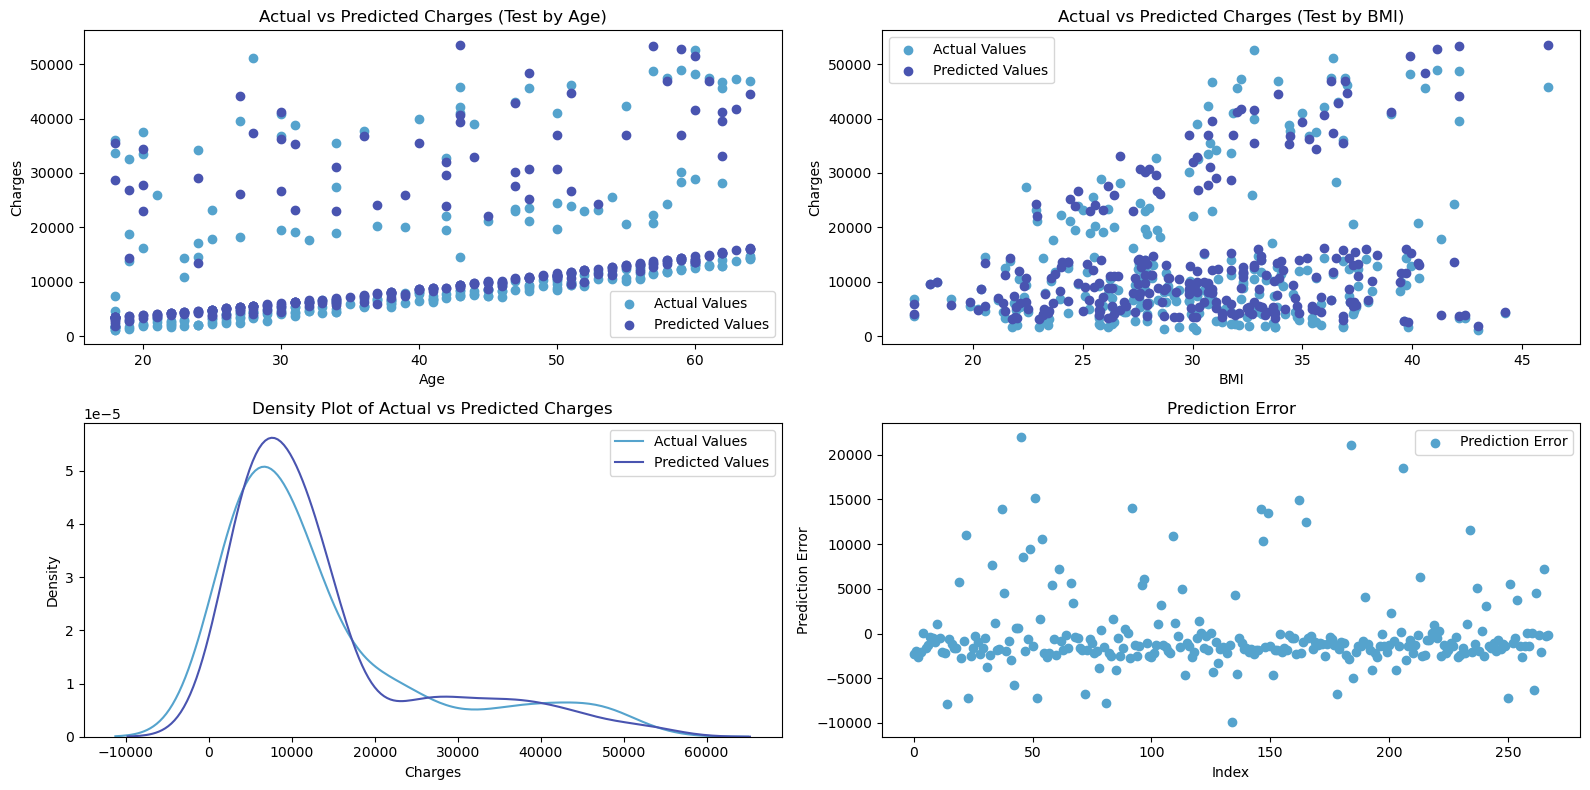

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette to 'icefire'
sns.set_palette('icefire')

# Creating the figure and subplots
plt.figure(figsize=(16, 8))

# Scatter age plot for actual vs predicted
plt.subplot(2, 2, 1)
plt.scatter(X_test['age'], y_test, label='Actual Values')
plt.scatter(X_test['age'], y_pred, label='Predicted Values')
plt.title('Actual vs Predicted Charges (Test by Age)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()

# Scatter bmi plot for actual vs predicted
plt.subplot(2, 2, 2)
plt.scatter(X_test['bmi'], y_test, label='Actual Values')
plt.scatter(X_test['bmi'], y_pred, label='Predicted Values')
plt.title('Actual vs Predicted Charges (Test by BMI)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()

# Density plot for actual vs predicted
plt.subplot(2, 2, 3)
sns.distplot(y_test, hist=False, label="Actual Values")
sns.distplot(y_pred, hist=False, label="Predicted Values")
plt.title('Density Plot of Actual vs Predicted Charges')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.legend()


# Scatter plot for error
residuals = y_test - y_pred
plt.subplot(2, 2, 4)
plt.scatter(range(len(y_test)), residuals, label='Prediction Error')
plt.title('Prediction Error')
plt.xlabel('Index')
plt.ylabel('Prediction Error')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


C:\Users\Anastasia Giovanka\AppData\Local\Temp\ipykernel_29468\582953577.py:39: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df.index, y='pr_error', data=df, palette='icefire', ax=axes[1][1])


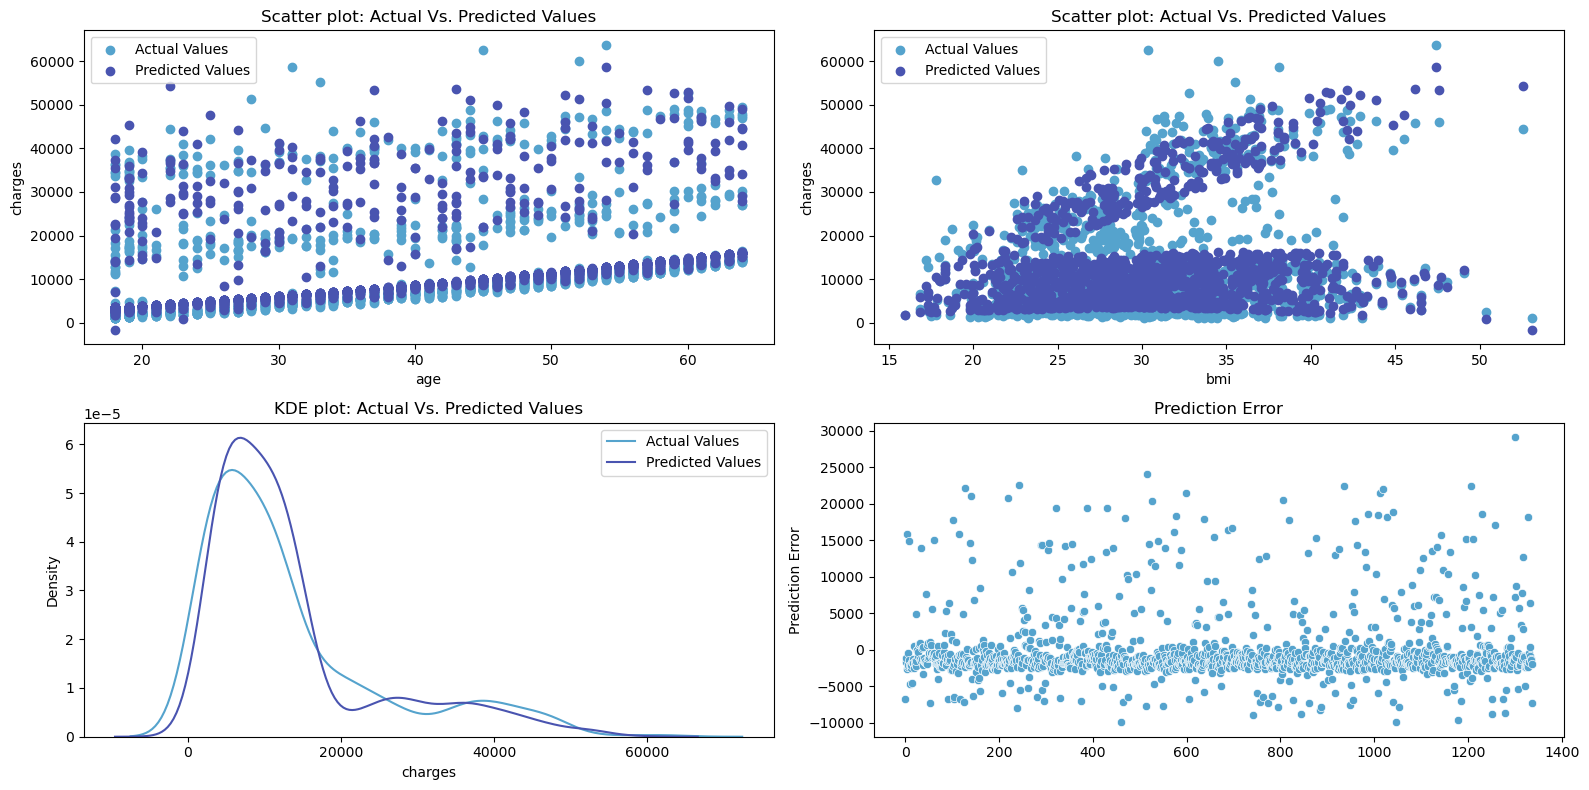

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('icefire')
icefire_palette = sns.color_palette('icefire')

# Use the model to predict values for the entire dataset for visualization purposes.
df['predictions'] = model.predict(poly.transform(X))

# Calculate prediction error for each observation
df['pr_error'] = df['charges'] - df['predictions']


fig, axes = plt.subplots(2, 2, figsize=(16, 8))


axes[0][0].scatter(df['age'], df['charges'], color=icefire_palette[0], label='Actual Values')
axes[0][0].scatter(df['age'], df['predictions'], color=icefire_palette[1], label='Predicted Values')
axes[0][0].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0][0].set_xlabel("age")
axes[0][0].set_ylabel("charges")
axes[0][0].legend()


axes[0][1].scatter(df['bmi'], df['charges'], color=icefire_palette[0], label='Actual Values')
axes[0][1].scatter(df['bmi'], df['predictions'], color=icefire_palette[1], label='Predicted Values')
axes[0][1].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0][1].set_xlabel("bmi")
axes[0][1].set_ylabel("charges")
axes[0][1].legend()


sns.kdeplot(df['charges'], label="Actual Values", ax=axes[1][0])
sns.kdeplot(df['predictions'], label="Predicted Values", ax=axes[1][0])
axes[1][0].set_title("KDE plot: Actual Vs. Predicted Values")
axes[1][0].legend()


sns.scatterplot(x=df.index, y='pr_error', data=df, palette='icefire', ax=axes[1][1])
axes[1][1].set_title("Prediction Error")
axes[1][1].set_ylabel("Prediction Error")

fig.tight_layout()
plt.show()


## Regression Tree

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


X = df[['age', 'bmi', 'smoker_yes']]  # Features
y = df['charges']  # Target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Regression Tree model
regressor = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Calculate the MSE and R² score
mse_tree = mean_squared_error(y_test, y_pred)
r2_tree = r2_score(y_test, y_pred)

print(f'MSE : {mse_tree}')
print(f'R² score : {r2_tree}')


MSE : 40131651.96035962
R² score : 0.7415009348241524


C:\Users\Anastasia Giovanka\AppData\Local\Temp\ipykernel_29468\3700229210.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_test['age'], y=y_test, ax=ax[0, 0],  palette=palette, label='Actual Values')
C:\Users\Anastasia Giovanka\AppData\Local\Temp\ipykernel_29468\3700229210.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_test['age'], y=y_pred, ax=ax[0, 0],  palette=palette, label='Predicted Values')
C:\Users\Anastasia Giovanka\AppData\Local\Temp\ipykernel_29468\3700229210.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_test['bmi'], y=y_test, ax=ax[0, 1],  palette=palette, label='Actual Values')
C:\Users\Anastasia Giovanka\AppData\Local\Temp\ipykernel_29468\3700229210.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_test['bmi'], y=y_pred, ax=ax[0, 1],  palette=pal

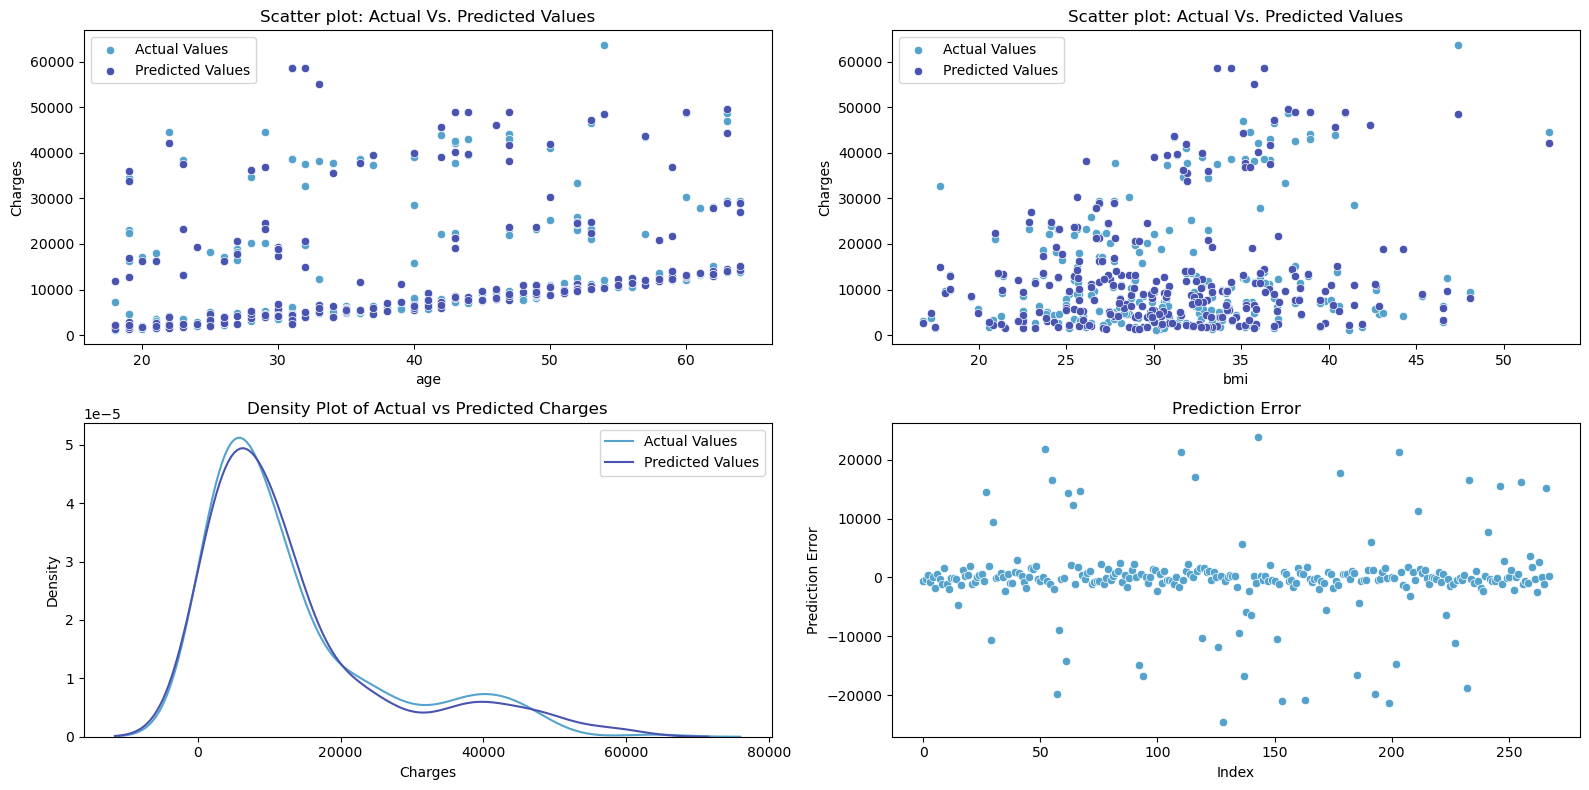

In [11]:
# Visualization
# Scatter plot for actual vs predicted values for age and bmi
fig, ax = plt.subplots(2, 2, figsize=(16,8))
palette = sns.color_palette('icefire')

# Age vs Charges
sns.scatterplot(x=X_test['age'], y=y_test, ax=ax[0, 0],  palette=palette, label='Actual Values')
sns.scatterplot(x=X_test['age'], y=y_pred, ax=ax[0, 0],  palette=palette, label='Predicted Values')
ax[0, 0].set_title('Scatter plot: Actual Vs. Predicted Values')
ax[0, 0].set_ylabel('Charges')
ax[0, 0].legend()

# BMI vs Charges
sns.scatterplot(x=X_test['bmi'], y=y_test, ax=ax[0, 1],  palette=palette, label='Actual Values')
sns.scatterplot(x=X_test['bmi'], y=y_pred, ax=ax[0, 1],  palette=palette, label='Predicted Values')
ax[0, 1].set_title('Scatter plot: Actual Vs. Predicted Values')
ax[0, 1].set_ylabel('Charges')
ax[0, 1].legend()

# Distribution plot for actual vs predicted values
sns.kdeplot(y_test, ax=ax[1, 0],  palette=palette, label='Actual Values')
sns.kdeplot(y_pred, ax=ax[1, 0],  palette=palette, label='Predicted Values')
ax[1, 0].set_title('Density Plot of Actual vs Predicted Charges')
ax[1, 0].set_xlabel('Charges')
ax[1, 1].set_ylabel('Density')
ax[1, 0].legend()


# Prediction error plot
sns.scatterplot(x=np.arange(len(y_test)), y=(y_test - y_pred), ax=ax[1, 1],  palette=palette,)
ax[1, 1].set_title('Prediction Error')
ax[1, 1].set_xlabel('Index')
ax[1, 1].set_ylabel('Prediction Error')

# Show the plot
plt.tight_layout()
plt.show()

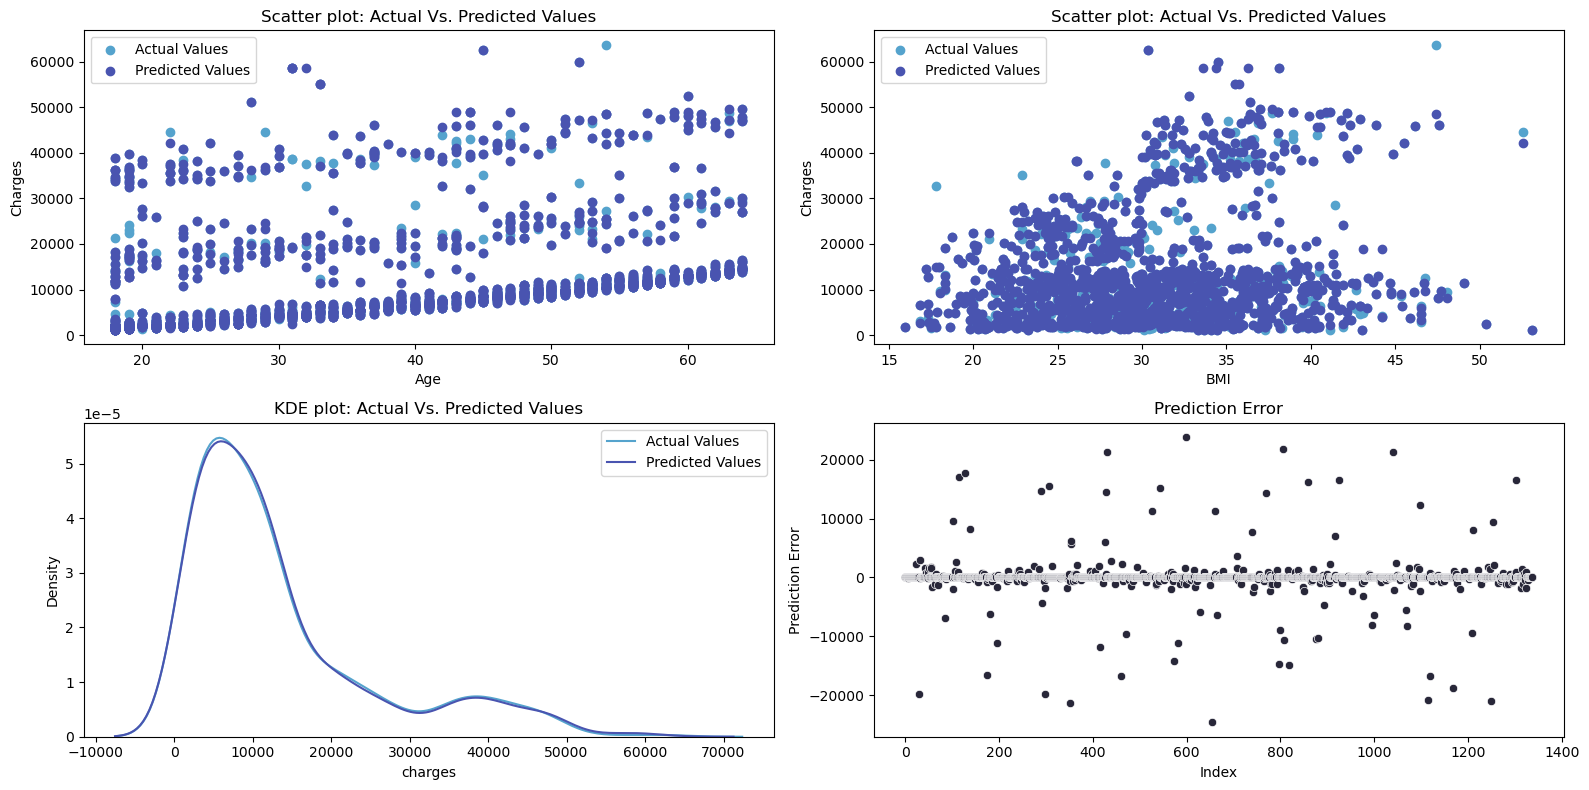

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette to 'icefire'
icefire = sns.color_palette('icefire')

# Assuming 'regressor' and 'X' are previously defined and df is your DataFrame
df['predictions'] = regressor.predict(X)

# Calculate prediction error for each observation
df['pr_error'] = df['charges'] - df['predictions']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Scatter plot for age vs. charges using colors from the 'icefire' palette
axes[0][0].scatter(df['age'], df['charges'], color=icefire[0], label='Actual Values')
axes[0][0].scatter(df['age'], df['predictions'], color=icefire[1], label='Predicted Values')
axes[0][0].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0][0].set_xlabel("Age")
axes[0][0].set_ylabel("Charges")
axes[0][0].legend()

# Scatter plot for bmi vs. charges using colors from the 'icefire' palette
axes[0][1].scatter(df['bmi'], df['charges'], color=icefire[0], label='Actual Values')
axes[0][1].scatter(df['bmi'], df['predictions'], color=icefire[1], label='Predicted Values')
axes[0][1].set_title("Scatter plot: Actual Vs. Predicted Values")
axes[0][1].set_xlabel("BMI")
axes[0][1].set_ylabel("Charges")
axes[0][1].legend()

# Distribution plot for actual vs. predicted charges with seaborn and the 'icefire' palette
sns.kdeplot(df['charges'], color=icefire[0], label="Actual Values", ax=axes[1][0])
sns.kdeplot(df['predictions'], color=icefire[1], label="Predicted Values", ax=axes[1][0])
axes[1][0].set_title("KDE plot: Actual Vs. Predicted Values")
axes[1][0].legend()

# Scatter plot for prediction error with seaborn and the 'icefire' palette
sns.scatterplot(x=df.index, y='pr_error', data=df, color=icefire[2], ax=axes[1][1])
axes[1][1].set_title("Prediction Error")
axes[1][1].set_xlabel("Index")
axes[1][1].set_ylabel("Prediction Error")

# Show the plot
plt.tight_layout()
plt.show()


## Discussion

In [13]:
data = {
    'Model': ['Polynomial Regression', 'Regression Tree'],
    'MSE': [mse_poly, mse_tree],
    'R-Square': [r2_poly, r2_tree]
}

# Create a DataFrame using the sample data
compare_results = pd.DataFrame(data)

# Display the DataFrame as a table
compare_results

,Model,MSE,R-Square
0,Polynomial Regression,1.952081e+07,0.877328
1,Regression Tree,4.013165e+07,0.741501


## Conclusion

Model Polynomial Regression adalah model yang paling baik.

Keputusan ini bergantung pada akurasi numerik dan kemampuan data untuk menggeneralisasi.